Richter Scale: 4.43


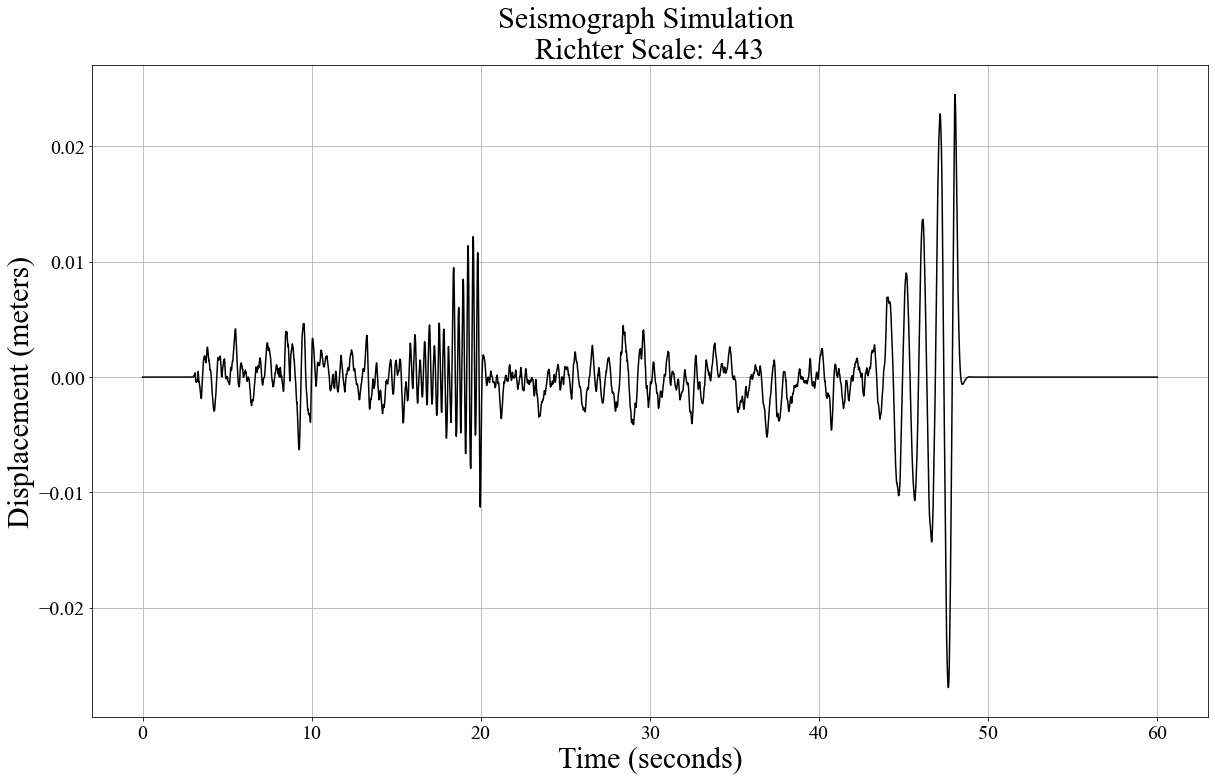

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

# Define the parameters of the mass-spring-damper system
m = 0.03  # Mass (kg)
c = 0.5  # Damping coefficient (Ns/m) mechanical + electrical 
k = 3.6186  # Spring constant (N/m)

# Define the earthquake force as a function of time
def earthquake_force(t):
    """
    Generate an earthquake force with added random noise.

    Parameters:
        t (float or array-like): Time or time array.
        noise_level (float): Magnitude of the random noise (default is 10.0).

    Returns:
        float or array-like: Earthquake force with added noise.
    """
    noise1 = 0.00005 * np.random.randn(*np.shape(t))  # Generate random noise
    noise2 = 0.08 * np.random.randn(*np.shape(t))
    
    # Decaying terms for P-wave and S-wave signals
    p_decay = np.exp(-0.03 * (t - 4) + noise2) * np.exp(0.3 * t-4)
    s_decay_1 = np.exp(-0.05 * (t - 10) + noise2) * np.exp(0.5 * t-10)
    s_decay_2 = np.exp(-0.05 * (t - 20) + noise2) * np.exp(0.5 * t-20)
    ss_decay = np.exp(-0.05 * (t - 20) + noise2) * np.exp(0.5 * t-20)
    
    ss_signal = np.where((t >= 28) & (t <= 48), 0.01 * np.cos(2*np.pi * t) * ss_decay + noise2, 0)
    s_signal_1 = np.where((t >= 8) & (t <= 20), 0.3 * np.cos(7*np.pi * t) * s_decay_1 + noise2, 0)
    s_signal_2 = np.where((t >= 18) & (t <= 30), 0.3 * np.cos(7*np.pi * t) * s_decay_2 + noise2, 0)
    p_signal = np.where((t >= 3) & (t <= 10), 0.01 * np.sin(5*np.pi * t + np.pi/2) * p_decay + noise2, 0)
    
    # Add the signal and noise
    force = p_signal + s_signal_1 + s_signal_2  + ss_signal + noise1
    
    return force

# Runge-Kutta method for numerical integration
def runge_kutta_step(x, v, F_t, dt):
    k1_v = (F_t - c * v - k * x) / m
    k1_x = v
    k2_v = (F_t - c * (v + 0.5 * dt * k1_v) - k * (x + 0.5 * dt * k1_x)) / m
    k2_x = v + 0.5 * dt * k1_v
    k3_v = (F_t - c * (v + 0.5 * dt * k2_v) - k * (x + 0.5 * dt * k2_x)) / m
    k3_x = v + 0.5 * dt * k2_v
    k4_v = (F_t - c * (v + dt * k3_v) - k * (x + dt * k3_x)) / m
    k4_x = v + dt * k3_v

    new_v = v + (dt / 6.0) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
    new_x = x + (dt / 6.0) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    return new_x, new_v

# Simulation settings
total_time = 60.0  # Total simulation time (seconds)
dt = 0.001         # Time step for numerical integration (seconds)

# Initialize arrays for time and displacement
time = np.arange(0, total_time, dt)
x = np.zeros_like(time)
v = np.zeros_like(time)

# Initial conditions
x[0] = 0.0
v[0] = 0.0

# Numerical integration using Runge-Kutta method
for i in range(1, len(time)):
    F_t = earthquake_force(time[i])
    x[i], v[i] = runge_kutta_step(x[i - 1], v[i - 1], F_t, dt)
    
A = np.max(np.abs(x))
# Reference amplitude A0 (1 micron in meters)
A0 = 1e-6
# Calculate the Richter scale
richter_scale = np.log10(A / A0)

# Print the Richter scale value
print(f"Richter Scale: {richter_scale:.2f}")

# Plot the seismogram
plt.figure(figsize=(20,12))
plt.plot(time, x, 'k')
plt.xlabel('Time (seconds)', fontsize=30)
plt.ylabel('Displacement (meters)', fontsize=30)
plt.title(f'Seismograph Simulation \nRichter Scale: {richter_scale:.2f}', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.savefig('Downloads/Seismograph_Simulation_Sanjana_Gupta.eps', bbox_inches='tight')
plt.savefig('Downloads/Seismograph_Simulation_Sanjana_Gupta.pdf', bbox_inches='tight')
plt.show()


## Animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(figsize=(20, 12))
fig.patch.set_facecolor('white')

# Define the parameters of the mass-spring-damper system
m = 0.03  # Mass (kg)
c = 0.5  # Damping coefficient (Ns/m) mechanical + electrical 
k = 3.6186  # Spring constant (N/m)

# Define the earthquake force as a function of time

def earthquake_force(t):
    """
    Generate an earthquake force with added random noise.

    Parameters:
        t (float or array-like): Time or time array.
        noise_level (float): Magnitude of the random noise (default is 10.0).

    Returns:
        float or array-like: Earthquake force with added noise.
    """
    noise1 = 0.00005 * np.random.randn(*np.shape(t))  # Generate random noise
    noise2 = 0.08 * np.random.randn(*np.shape(t))
    
    # Decaying terms for P-wave and S-wave signals
    p_decay = np.exp(-0.03 * (t - 4) + noise2) * np.exp(0.3 * t-4)
    s_decay_1 = np.exp(-0.05 * (t - 10) + noise2) * np.exp(0.5 * t-10)
    s_decay_2 = np.exp(-0.05 * (t - 20) + noise2) * np.exp(0.5 * t-20)
    ss_decay = np.exp(-0.05 * (t - 20) + noise2) * np.exp(0.5 * t-20)
    
    ss_signal = np.where((t >= 28) & (t <= 48), 0.01 * np.cos(2*np.pi * t) * ss_decay + noise2, 0)
    s_signal_1 = np.where((t >= 8) & (t <= 20), 0.3 * np.cos(7*np.pi * t) * s_decay_1 + noise2, 0)
    s_signal_2 = np.where((t >= 18) & (t <= 30), 0.3 * np.cos(7*np.pi * t) * s_decay_2 + noise2, 0)
    p_signal = np.where((t >= 3) & (t <= 10), 0.01 * np.sin(5*np.pi * t + np.pi/2) * p_decay + noise2, 0)
    
    # Add the signal and noise
    force = p_signal + s_signal_1 + s_signal_2  + ss_signal + noise1
    
    return force

# Runge-Kutta method for numerical integration
def runge_kutta_step(x, v, F_t, dt):
    k1_v = (F_t - c * v - k * x) / m
    k1_x = v
    k2_v = (F_t - c * (v + 0.5 * dt * k1_v) - k * (x + 0.5 * dt * k1_x)) / m
    k2_x = v + 0.5 * dt * k1_v
    k3_v = (F_t - c * (v + 0.5 * dt * k2_v) - k * (x + 0.5 * dt * k2_x)) / m
    k3_x = v + 0.5 * dt * k2_v
    k4_v = (F_t - c * (v + dt * k3_v) - k * (x + dt * k3_x)) / m
    k4_x = v + dt * k3_v

    new_v = v + (dt / 6.0) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
    new_x = x + (dt / 6.0) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    return new_x, new_v

# Simulation settings
total_time = 50.0  # Total simulation time (seconds)
dt = 0.01         # Time step for numerical integration (seconds)

# Initialize arrays for time and displacement
time = np.arange(0, total_time, dt)
x = np.zeros_like(time)
v = np.zeros_like(time)

# Initial conditions
x[0] = 0.0
v[0] = 0.0

# Numerical integration using Runge-Kutta method
for i in range(1, len(time)):
    F_t = earthquake_force(time[i])
    x[i], v[i] = runge_kutta_step(x[i - 1], v[i - 1], F_t, dt)
    
A = np.max(np.abs(x))
# Reference amplitude A0 (1 micron in meters)
A0 = 1e-6
# Calculate the Richter scale
richter_scale = np.log10(A / A0)

# Print the Richter scale value
print(f"Richter Scale: {richter_scale:.2f}")

line, = ax.plot([], [], 'k', lw=2)
richter_text = ax.text(0.95, 0.95, "", transform=ax.transAxes,fontsize=20, ha='right', va='top')

def update(frame):
    x_data = time[:frame]
    y_data = x[:frame]
    line.set_data(x_data, y_data)
    ax.set_xlim(0, total_time)
    ax.set_ylim(np.min(x), np.max(x))
    ax.set_xlabel('Time (seconds)', fontsize=30)
    ax.set_ylabel('Displacement (meters)', fontsize=30)
    ax.set_xlim(0,50)
    ax.set_ylim(-0.06,0.06)
    ax.tick_params(axis='both', which='both', labelsize=20)
    ax.set_title(f'Seismograph Simulation', fontsize=30)
    ax.grid(True)
    if len(x_data) > 0:  # Check if x_data is non-empty
        A_frame = np.max(np.abs(y_data))
        richter_scale_frame = np.abs(np.log10(A_frame / A0))
        richter_text.set_text(f'Richter Scale: {richter_scale_frame:.2f}')
    return line, richter_text

ani = animation.FuncAnimation(fig, update, frames=len(time), interval=10, blit=True)
ani.save("Downloads/Seismograph_Simulation_Sanjana_Gupta.gif", writer="pillow")

plt.show()

Richter Scale: 4.51


C:\Users\User\AppData\Local\Temp\ipykernel_10508\2459468722.py:106: RuntimeWarning: divide by zero encountered in log10
  richter_scale_frame = np.abs(np.log10(A_frame / A0))
